In [1]:
import glob 
import shutil
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

from scipy.stats import kde


In [2]:
from PIL import Image

In [3]:
from scipy.interpolate import griddata

In [4]:
xi00 = np.load('xi_AL8k.npy') 
yi00 = np.load('yi_AL8k.npy') 
zi00 = np.load('zi_AL8k.npy') 


xi01 = np.load('xi_MI8k.npy')
yi01 = np.load('yi_MI8k.npy')
zi01 = np.load('zi_MI8k.npy')

xi02 = np.load('xi_AL3k.npy')
yi02 = np.load('yi_AL3k.npy')
zi02 = np.load('zi_AL3k.npy')

xi03 = np.load('xi_MI3k.npy')
yi03 = np.load('yi_MI3k.npy')
zi03 = np.load('zi_MI3k.npy')

xi8k = np.load('xi_pred_8k.npy')
yi8k = np.load('yi_pred_8k.npy')
zi8k = np.load('zi_pred_8k.npy')

xi3k = np.load('xi_pred_3k.npy')
yi3k = np.load('yi_pred_3k.npy')
zi3k = np.load('zi_pred_3k.npy')

In [5]:
print (zi02 - zi00 )

[[0.07924539 0.07269581 0.06630296 ... 0.10029889 0.11115379 0.12223053]
 [0.07816069 0.0721391  0.06617531 ... 0.09393531 0.10330801 0.11312212]
 [0.07707536 0.07183747 0.06655855 ... 0.08742504 0.09546842 0.1041358 ]
 ...
 [0.11236287 0.10738933 0.10252543 ... 0.09685081 0.10908635 0.12082132]
 [0.11560702 0.11014124 0.10481386 ... 0.0993924  0.11263292 0.12577634]
 [0.11885223 0.11288819 0.10706745 ... 0.10335348 0.11690774 0.13076305]]


In [6]:
#zi01[zi01>0.08] = 0.08
zi01[zi01 < 0] = 0

In [7]:
zi03.max()

0.04294435679912567

In [8]:
zi8k[zi8k > 1] = 1

In [9]:
zi3k.shape

(40, 40)

In [14]:
zi02.max()

0.691231906414032

<Figure size 432x288 with 0 Axes>

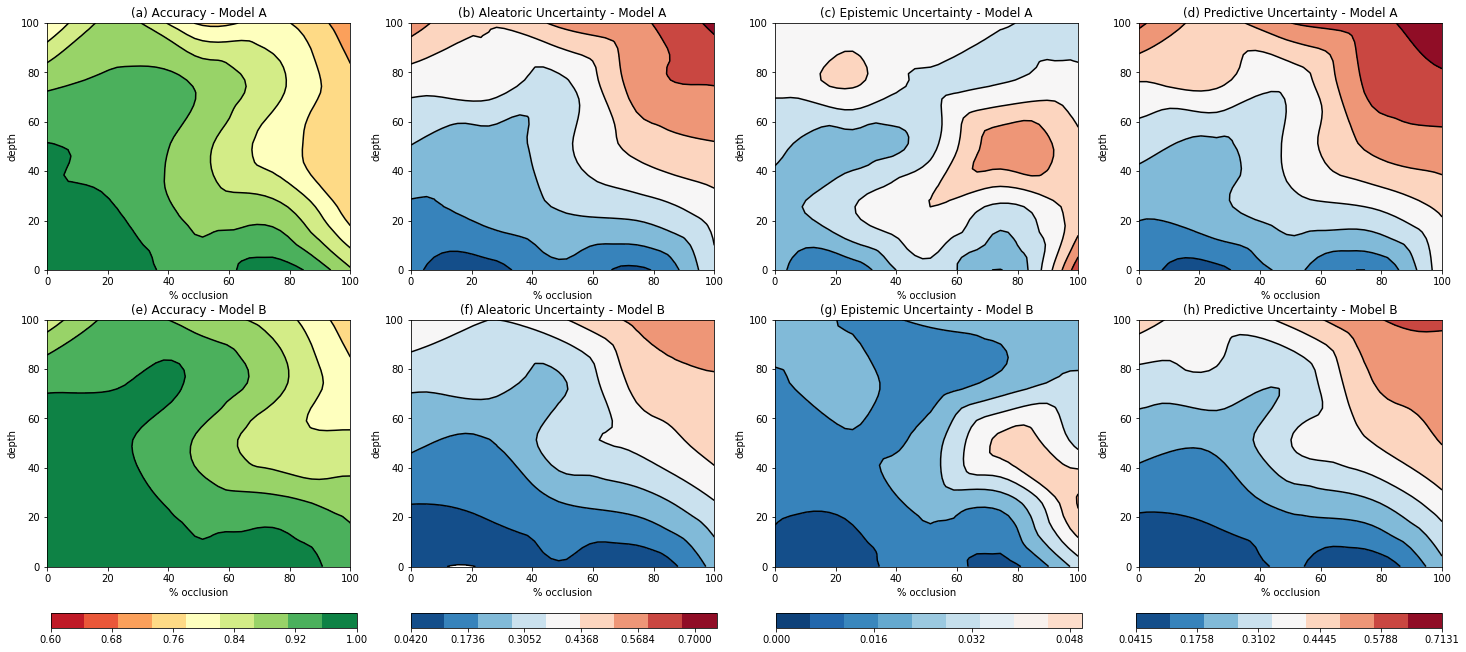

In [25]:
plt.subplots_adjust(bottom=2.5, right=None, top=3.5, wspace=None, hspace=0.2)
plt.tight_layout()
plt.figure(figsize=(25,10))

bbb = zi00 + zi01
ax1 = plt.subplot(2,4,1)
ax1.contour(xi3k, yi3k, zi3k, levels=np.linspace(0.6, 1., num=10, endpoint=True), linewidths=1.5, colors='k')
cntr1 = ax1.contourf(xi3k, yi3k, zi3k, levels=np.linspace(0.6, 1., num=10, endpoint=True), cmap="RdYlGn")
ax1.set_title('(a) Accuracy - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')


ax9 = plt.subplot(2,4,5)
ax9.contour(xi8k, yi8k, zi8k, levels=np.linspace(0.6, 1., num=10, endpoint=True), linewidths=1.5, colors='k')
cntr9 = ax9.contourf(xi8k, yi8k, zi8k, levels=np.linspace(0.6, 1., num=10, endpoint=True), cmap="RdYlGn")
ax9.set_title('(e) Accuracy - Model B')
plt.xlabel('% occlusion')
plt.ylabel('depth')


ax2 = plt.subplot(2,4,2)
ax2.contour(xi02, yi02, zi02, levels=np.linspace(0.042, 0.75, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr2 = ax2.contourf(xi02, yi02, zi02, levels=np.linspace(0.042, 0.75, num=10, endpoint=True), cmap="RdBu_r")
ax2.set_title('(b) Aleatoric Uncertainty - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')




zzz = zi02 + zi03
ax4 = plt.subplot(2,4,4)
ax4.contour(xi03, yi03, zzz, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), linewidths=1.5, colors='k')
cntr4 = ax4.contourf(xi03, yi03, zzz, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), cmap="RdBu_r")
ax4.set_title('(d) Predictive Uncertainty - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')

ax5 = plt.subplot(2,4,6)
ax5.contour(xi00, yi00, zi00, levels=np.linspace(0.042, 0.75, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr5 = ax5.contourf(xi00, yi00, zi00, levels=np.linspace(0.042, 0.75, num=10, endpoint=True), cmap="RdBu_r")
ax5.set_title('(f) Aleatoric Uncertainty - Model B')
plt.xlabel('% occlusion')
plt.ylabel('depth')

ax3 = plt.subplot(2,4,3)
ax3.contour(xi03, yi03, zi03, levels=np.linspace(0, 0.05, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr3 = ax3.contourf(xi03, yi03, zi03, levels=np.linspace(0, 0.05, num=10, endpoint=True), cmap="RdBu_r")
ax3.set_title('(c) Epistemic Uncertainty - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')
ax6 = plt.subplot(2,4,7)
ax6.contour(xi01, yi01, zi01, levels=np.linspace(0, 0.05, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr6 = ax6.contourf(xi01, yi01, zi01, levels=np.linspace(0, 0.05, num=10, endpoint=True), cmap="RdBu_r")
ax6.set_title('(g) Epistemic Uncertainty - Model B')
plt.xlabel('% occlusion')
plt.ylabel('depth')


ax7 = plt.subplot(2,4,8)
ax7.contour(xi01, yi01, bbb, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), linewidths=1.5, colors='k')
cntr7 = ax7.contourf(xi01, yi01, bbb, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), cmap="RdBu_r")
ax7.set_title('(h) Predictive Uncertainty - Mobel B')
plt.xlabel('% occlusion')
plt.ylabel('depth')

cax = plt.axes([0.327, 0.04, 0.17, 0.02])
cbar = plt.colorbar(cntr2, cax, orientation="horizontal")
#cbar.set_clim(vmax=1.1)
cbar_ticks = np.linspace(0.042, 0.7, num=6, endpoint=True)
cbar.set_ticks(cbar_ticks) 


cax1 = plt.axes([0.53, 0.04, 0.17, 0.02])
cbar1 = plt.colorbar(cntr3, cax1, orientation="horizontal")
cbar1.set_clim(vmax=0.08)
cbar_ticks1 = np.linspace(0.0, 0.08, num=6, endpoint=True)
cbar1.set_ticks(cbar_ticks1) 

cax2 = plt.axes([0.73, 0.04, 0.17, 0.02])
cbar2 = plt.colorbar(cntr7, cax2, orientation="horizontal")
cbar2.set_clim(vmax=zzz.max())
cbar_ticks2 = np.linspace(bbb.min(), zzz.max(), num=6, endpoint=True)
cbar2.set_ticks(cbar_ticks2) 

"""cax3 = plt.axes([0.73, 0.04, 0.17, 0.02])
cbar3 = plt.colorbar(cntr7, cax3, orientation="horizontal")
cbar3.set_clim(vmax=zzz.max())
cbar_ticks3 = np.linspace(bbb.min(), zzz.max(), num=6, endpoint=True)
cbar3.set_ticks(cbar_ticks3) """

cax0 = plt.axes([0.127, 0.04, 0.17, 0.02])
cbar0 = plt.colorbar(cntr1, cax0, orientation="horizontal")
cbar0.set_clim(vmax=1.0)
cbar_ticks0 = np.linspace(0.6, 1.0, num=6, endpoint=True)
cbar0.set_ticks(cbar_ticks0)

"""cax = plt.axes([0.327, 0.04, 0.17, 0.02])
cbar = plt.colorbar(cntr1, cax, orientation="horizontal")
cbar.set_clim(vmax=1.1)
cbar_ticks = np.linspace(0.042, 1.1, num=6, endpoint=True)
cbar.set_ticks(cbar_ticks) """


plt.show()

In [29]:
print bbb.min()
print bbb.max()

0.044203944417490995
0.8985270134424377


In [30]:
print zzz.min()
print zzz.max()

0.07961271236662265
1.0267798657392149


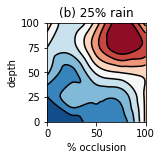

In [12]:
ax2 = plt.subplot(2,3,2)
ax2.contour(xi02, yi02, zzz, levels=np.linspace(zzz.min(), zzz.max(), num=10, endpoint=True), linewidths=1.5, colors='k')
cntr2 = ax2.contourf(xi02, yi02, zzz, levels=np.linspace(zzz.min(), zzz.max(), num=10, endpoint=True), cmap="RdBu_r")
ax2.set_title('(b) 25% rain')
plt.xlabel('% occlusion')
plt.ylabel('depth')
plt.show()